# Heart Disease Prediction

The goal is to predict the occurence of heart disease in patients based on 13 clinical parameters. To do this, I will use Python based libraries such as Pandas, Numpy, Scikit-Learn, MatplotLib and Seaborn to analize the data and implement Machine Learning models to make the predictions.

**Table of contents**
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

Is it possible to predict if a patient has or not heart disease given a set of clinical parameters? If so, how accurately?

## 2. Data

In this project I use the Heart Disease UCI dataset. It is available at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+disease) and there is also a version of it on [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci). 

The original dataset consisted of 76 clinical parameters, in the literature it is suggested using a subset of 14, which is done in this projetc. 

## 3. Evaluation 

The goal is to find a model with 95% accuracy.

## 4. Features

Below is the definition of what each column represents.

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Importing libraries

In this project the following libraries are used:
* Pandas for data analysis.
* NumPy for numerical operations.
* Matplotlib/seaborn for plotting or data visualization.
* Scikit-Learn for machine learning modelling and evaluation.

In [1]:
# Regular EDA (exploratory data analisys) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pprint

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# Feature scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# Choosing a color pallete
sns.color_palette("flare")

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

## Loading, visualizing and describing the data

In [3]:
# Loading and printing the dataset
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Below is the definition of what each column represents:**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest, looks at stress of heart during excercise, unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [4]:
# Creating a dictionary with the variable meanings for future reference 
variable_meanings={'age':'age of the pacient',
                  'sex':'{1=male;0=female', 
                  'cp':'chest pain type: 0=typical angina(chest pain related decrease blood supply to the heart); 1=atypical angina (chest pain not related to heart); 2=non-anginal pain (typically esophageal spasms (non heart related))3=Asymptomatic (chest pain not showing signs of disease)',
                  'trestbps':'resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern',
                  'chol':'serum cholestoral in mg/dl: serum = LDL + HDL + .2 * triglycerides; above 200 is cause for concern',
                  'fbs':'fasting blood sugar > 120 mg/dl (1 = true; 0 = false)',
                  'restecg':'0=nothing to note; 1=ST-T Wave abnormality (can range from mild symptoms to severe problemsm signals non-normal heart beat); 2=Possible or definite left ventricular hypertrophy (enlarged heart\'s main pumping chamber)',
                  'thalach':'maximum heart rate achieved',
                  'exang':'exercise induced angina (1 = yes; 0 = no)',
                  'oldpeak':'ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more',
                  'slope':'the slope of the peak exercise ST segment: 0=upsloping (better heart rate with excercise (uncommon)); 1=flatsloping (minimal change (typical healthy heart)); 2=downslopins (signs of unhealthy heart)',
                  'ca':'number of major vessels (0-3) colored by flourosopy: colored vessel means the doctor can see the blood passing through, the more blood movement the better (no clots)',
                  'thal':'thalium stress result: 1,3: normal; 6: fixed defect: used to be defect but ok now; 7: reversable defect: no proper blood movement when excercising',
                  'target': 'have disease or not (1=yes, 0=no) (= the predicted attribute)'}

# pprint.pprint(variable_meanings) --> to print the dictionary with line breaks

## Exploratory Data Analysis (EDA)

Checklist:
1. what questions need to be answered?
2. what are the different kinds of data in the problem?
3. what's missing from the data and how to deal with it?
4. where are the outliers?
5. how to get more out of the data?

In [5]:
# Getting some statistical information on the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Checking the data types of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Checking for missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart disease occurence

In [8]:
# Counting patients with and without heart disease
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

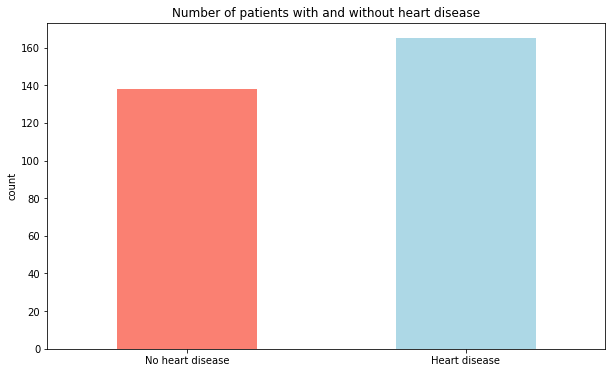

In [9]:
df['target'].value_counts().sort_index().plot(kind='bar', color=["salmon", "lightblue"], figsize=(10, 6));
ticks = [0,1]
labels = ['No heart disease', 'Heart disease']
plt.title('Number of patients with and without heart disease');
plt.xticks(ticks, labels, rotation=0);
plt.ylabel('count');


In [10]:
# relate the infos above to the description of each column -> check video 153

### Heart disease frequency according to sex

In [11]:
# Retrieving from the variable meanings dictionary how the patients' sex is classified
pprint.pprint(variable_meanings['sex'])

'{1=male;0=female'


In [12]:
# Amount of patients of each sex
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

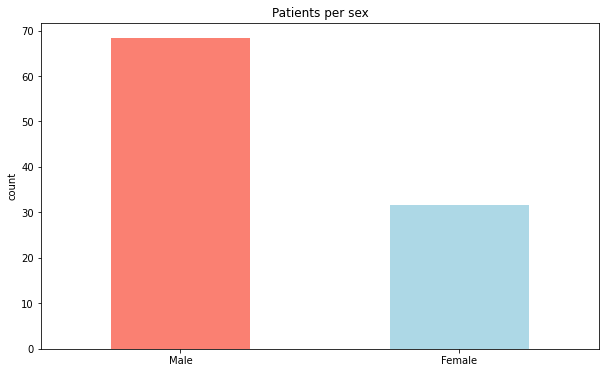

In [13]:
(df['sex'].value_counts(normalize=True)*100).plot(kind='bar', color=["salmon", "lightblue"], figsize=(10, 6))
ticks = [0,1]
labels = ['Male', 'Female']
plt.title('Patients per sex');
plt.xticks(ticks, labels, rotation=0);
plt.ylabel('count');

In [14]:
df['sex'].value_counts(normalize=True)*100

1    68.316832
0    31.683168
Name: sex, dtype: float64

There are approximately 68.31% males and 31.68% females. 

In [15]:
# Heart disease occurence according to patients' sex

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


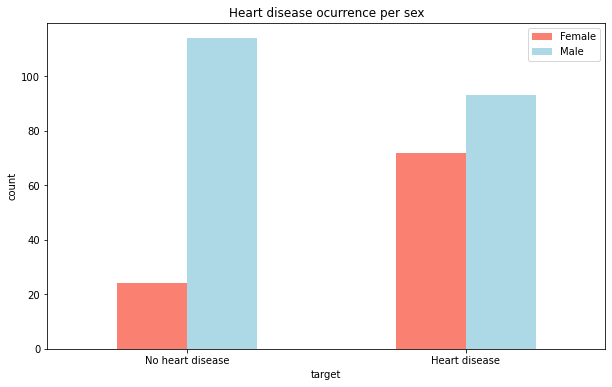

In [16]:
pd.crosstab(df.target, df.sex).plot(kind='bar', color=["salmon", "lightblue"], figsize=(10, 6)); 
ticks = [1, 0]
labels = ['Heart disease', 'No heart disease']
plt.title('Heart disease ocurrence per sex');
plt.legend(['Female', 'Male']);
plt.xticks(ticks,labels, rotation=0);
plt.ylabel('count');

In [17]:
# CHANGE COLOR SCHEMEEEEEE

In [18]:
# chances of male and female having hd? does it reflect real life numbers? the original ds does not take race 
# into consideration, should I mention it?

In [19]:
# maybe not talk about probs on 1 feature alone


### Age vs. Maximum Heart Rate

In [20]:
# Printing variable dictionary to check which one corresponds to Maximum Heart Rate
pprint.pprint(variable_meanings)

{'age': 'age of the pacient',
 'ca': 'number of major vessels (0-3) colored by flourosopy: colored vessel '
       'means the doctor can see the blood passing through, the more blood '
       'movement the better (no clots)',
 'chol': 'serum cholestoral in mg/dl: serum = LDL + HDL + .2 * triglycerides; '
         'above 200 is cause for concern',
 'cp': 'chest pain type: 0=typical angina(chest pain related decrease blood '
       'supply to the heart); 1=atypical angina (chest pain not related to '
       'heart); 2=non-anginal pain (typically esophageal spasms (non heart '
       'related))3=Asymptomatic (chest pain not showing signs of disease)',
 'exang': 'exercise induced angina (1 = yes; 0 = no)',
 'fbs': 'fasting blood sugar > 120 mg/dl (1 = true; 0 = false)',
 'oldpeak': 'ST depression induced by exercise relative to rest looks at '
            'stress of heart during excercise unhealthy heart will stress more',
 'restecg': '0=nothing to note; 1=ST-T Wave abnormality (can range 

Below I use the Matplotlib function to plot the histogram and set `bins=auto`. This sets the bin creation strategy as automatic, which is recomended in the [documentation](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html). As stated in the documentation, when bins is `bins=auto`, the strategy is:"
"Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance."
[**For visualisation, using the ‘auto’ option is suggested.**](https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges)

Text(0.5, 1.0, 'Patients age distribution')

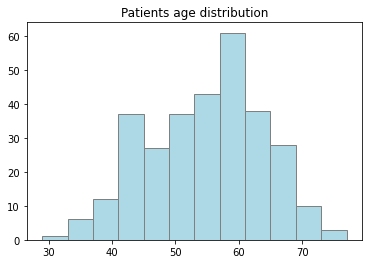

In [21]:
# Viewing the patients' age distribution
plt.hist(df['age'], bins='auto', color='lightblue', edgecolor='gray') # -> why? what does it tell me? 
plt.title('Patients age distribution')

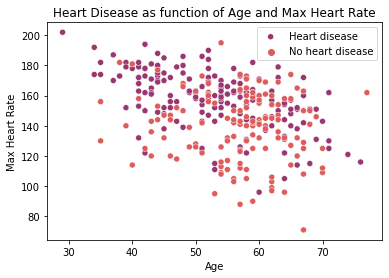

In [22]:
sns.scatterplot(x=df['age'], y=df['thalach'], hue=df['target'],
                palette='flare');

plt.title("Heart Disease as function of Age and Max Heart Rate");
plt.xlabel("Age");
plt.ylabel("Max Heart Rate");
plt.legend(['Heart disease', 'No heart disease']);

In [23]:
# here I should talk about max heart rate values normal for each age group -> cite it

In [24]:
# chest pain type x target 

# MAYBE HERE I CAN RELATE TO SEX BC SYMPTOMS ARE DIFFERENT IN MEN AND WOMEN

# add description of data

# make the title of the analysis a header (ex Chest pains and Heart Disease Occurence)


### Age and sex vs. heart disease

In [25]:

females = df[['age', 'target']].loc[df['sex'] == 0]
females

,age,target
2,41,1
4,57,1
6,56,1
11,48,1
14,58,1
...,...,...
289,55,0
292,58,0
296,63,0
298,57,0


In [26]:
females['age'].min(), females['age'].max() 

(34, 76)

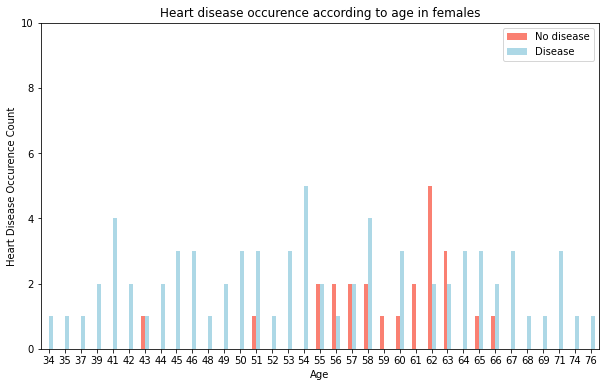

In [27]:
pd.crosstab(females['age'], females['target']).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue'])
plt.title('Heart disease occurence according to age in females');
plt.xlabel('Age');
plt.ylabel('Heart Disease Occurence Count');
plt.ylim(0,10)
plt.legend(['No disease', 'Disease']);
plt.xticks(rotation=0);

In [28]:
males = df[['age', 'target']].loc[df['sex'] == 1]
males

,age,target
0,63,1
1,37,1
3,56,1
5,57,1
7,44,1
...,...,...
295,63,0
297,59,0
299,45,0
300,68,0


In [29]:
males['age'].min(), males['age'].max() 

(29, 77)

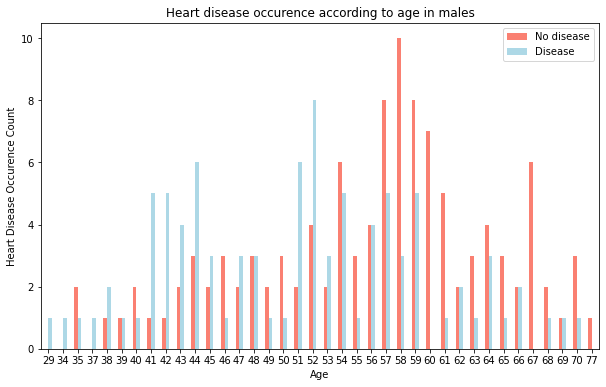

In [30]:
pd.crosstab(males['age'], males['target']).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue'])
plt.title('Heart disease occurence according to age in males');
plt.xlabel('Age');
plt.ylabel('Heart Disease Occurence Count');
plt.legend(['No disease', 'Disease']);
plt.xticks(rotation=0);


### Chest pain and occurence of heart disease

In [31]:
# Retrieving from the variable meanings dictionary the definition of each chest pain type 
pprint.pprint(variable_meanings['cp'])

('chest pain type: 0=typical angina(chest pain related decrease blood supply '
 'to the heart); 1=atypical angina (chest pain not related to heart); '
 '2=non-anginal pain (typically esophageal spasms (non heart '
 'related))3=Asymptomatic (chest pain not showing signs of disease)')


In [32]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [33]:
pd.crosstab(df['cp'], df['target'], normalize=True)*100

target,0,1
cp,,
0,34.323432,12.871287
1,2.970297,13.531353
2,5.940594,22.772277
3,2.310231,5.280528


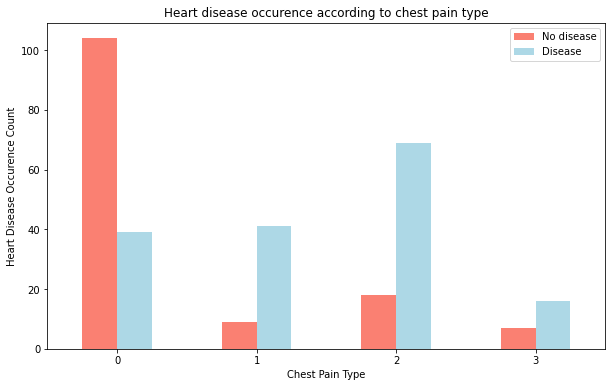

In [34]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue']) # say the percentages of people with each chest pain type and hd or not
plt.title('Heart disease occurence according to chest pain type');
plt.xlabel('Chest Pain Type');
plt.ylabel('Heart Disease Occurence Count');
plt.legend(['No disease', 'Disease']);
plt.xticks(rotation=0);

### Correlation matrix

The correlation matrix, as the name implies, represents the correlation betweent two variables, shown as values between 0 and 1. 

* Values closer to 1 indicate a strong positive correlation between the two variables, i.e. if the value one of the variables increases, the value of the other one also increases.

* Values closer to -1 indicate a strong negative correlation between the two variables, i.e. if the value one of the variables decreases, the value of the other one also descreases.

* Values closer to 0 indicate the lack of correlation between the variables, i.e. they are independent of each other.

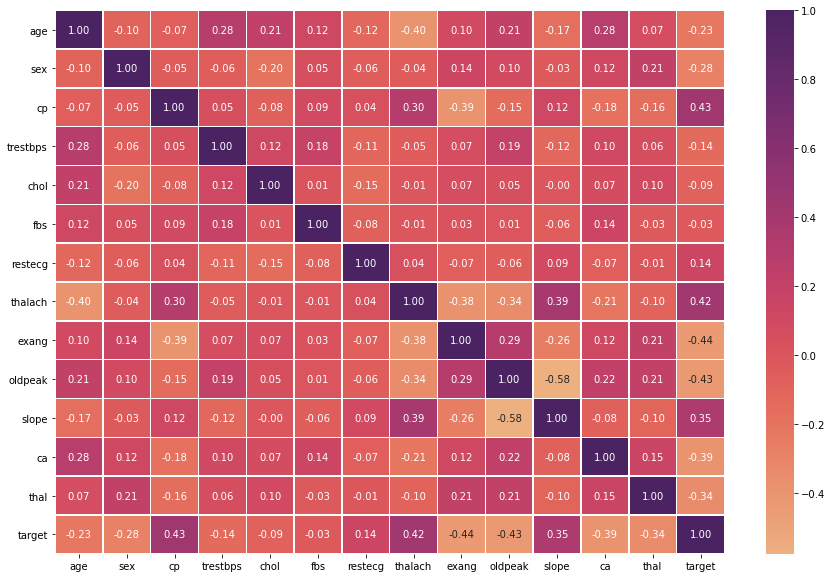

In [35]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='flare')

Since the goal is to try to predict the occurence of hearti disease, the focus is on the correlation between the feature variables and the target variable. A few things can be noted from the matrix:

* The strongest positive correlations are: 
    1. Chest pain (cp) = 0.43;
    2. Max heart rate (thalach) = 0.42;
    3. Slope of the peak exercise ST segment (slope) = 0.35
* The strongest negative correlations are: 
    1. Exercise induced angina (exang) = -0.44;
    2. ST depression induced by exercise relative to rest (oldpeak) = -0.43;
    3. Number of major vessels (0-3) colored by flourosopy (ca) = -0.39
* The values closest do 0 (weakest correlation) are:
    1. Fasting blood sugar > 120 mg/dl (fbs) = -0.03
    2. Serum cholestoral in mg/dl (chol) = -0.09
    3. Resting blood pressure (trestbps) = -0.14
    4. Resting electrocardiographic results(restecg) = 0.14


## 5. Modelling

In this project the following models will be used:
1. [Logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
2. [K-Nearest Neighbours Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. [Random Forest Clasifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
4. [Linear SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [36]:
# Defining empty dictionaries to store all of the models' scores for later use

logistic_regression = {}
knn = {}
random_forest = {}
linear_svc = {}

#### Preparing the data for modelling - Splitting

In [37]:
# Split data into X and y

# Independent variables
X = df.drop('target', axis=1)

# Target variable
y = df['target']

In [38]:
# Independent variables
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [39]:
# Target variable
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [40]:
# Define a random seed so the results are reproductible
np.random.seed(42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Preparing the data for modelling - Feature Scalling

write here what normalization does

In [41]:
## Data normalization using sklearn

# Copy data
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

# Fit scaler using training set
normalization = MinMaxScaler().fit(X_train)

# Normalize training set
X_train_normalized = pd.DataFrame(normalization.transform(X_train_norm))

# Normalize test set
X_test_normalized = pd.DataFrame(normalization.transform(X_test_norm))

In [42]:
# Check normalized train set
X_train_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.270833,1.0,0.333333,0.265306,0.378753,0.0,0.5,0.649123,0.0,0.000000,1.0,0.0,0.666667
1,0.604167,1.0,0.000000,0.571429,0.321016,0.0,0.0,0.201754,1.0,0.142857,1.0,0.0,1.000000
2,0.354167,1.0,0.666667,0.571429,0.230947,0.0,0.5,0.517544,0.0,0.642857,0.5,0.0,0.666667
3,0.541667,0.0,0.333333,0.418367,0.274827,0.0,0.0,0.640351,0.0,0.250000,0.5,0.0,0.666667
4,0.645833,1.0,0.000000,0.234694,0.228637,1.0,0.5,0.631579,1.0,0.250000,1.0,0.5,1.000000


In [43]:
# Check normalized test set
X_test_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.583333,1.0,0.000000,0.571429,0.334873,0.0,0.0,0.210526,1.0,0.107143,0.5,0.25,0.333333
1,0.625000,1.0,1.000000,0.775510,0.362587,0.0,0.0,0.622807,0.0,0.035714,0.5,0.00,1.000000
2,0.583333,1.0,0.666667,0.571429,-0.011547,1.0,0.5,0.745614,0.0,0.035714,1.0,0.25,1.000000
3,0.562500,0.0,0.000000,0.408163,0.642032,0.0,0.0,0.543860,1.0,0.339286,0.5,0.50,1.000000
4,0.875000,0.0,0.666667,0.163265,0.309469,1.0,0.0,0.368421,0.0,0.000000,1.0,0.25,0.666667


In [44]:
## Data standardization using sklearn

# Copy data
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# Fit scaler using training set
standard = StandardScaler().fit(X_train)
    
# Standartize training set
X_train_standardized = pd.DataFrame(standard.transform(X_train_stand))
    
# Standartize test set
X_test_standardized = pd.DataFrame(standard.transform(X_test_stand))


In [45]:
# Check standardized train set
X_train_standardized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.356798,0.722504,0.008099,-0.616856,0.914034,-0.383301,0.843133,0.532781,-0.676632,-0.920864,0.953905,-0.689701,-0.509048
1,0.385086,0.722504,-0.971891,1.169491,0.439527,-0.383301,-1.046109,-1.753582,1.477907,-0.193787,0.953905,-0.689701,1.178480
2,-0.921327,0.722504,0.988089,1.169491,-0.300704,-0.383301,0.843133,-0.139679,-0.676632,2.350982,-0.694988,-0.689701,-0.509048
3,0.058483,-1.384075,0.008099,0.276318,0.059921,-0.383301,-1.046109,0.487950,-0.676632,0.351521,-0.694988,-0.689701,-0.509048
4,0.602822,0.722504,-0.971891,-0.795490,-0.319684,2.608918,0.843133,0.443119,1.477907,0.351521,0.953905,1.333421,1.178480


In [46]:
# Check standardized test set
X_test_standardized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.276218,0.722504,-0.971891,1.169491,0.553408,-0.383301,-1.046109,-1.708752,1.477907,-0.375556,-0.694988,0.321860,-2.196576
1,0.493954,0.722504,1.968079,2.360389,0.781172,-0.383301,-1.046109,0.398289,-0.676632,-0.739095,-0.694988,-0.689701,1.178480
2,0.276218,0.722504,0.988089,1.169491,-2.293633,2.608918,0.843133,1.025918,-0.676632,-0.739095,0.953905,0.321860,1.178480
3,0.167350,-1.384075,-0.971891,0.216773,3.077785,-0.383301,-1.046109,-0.005187,1.477907,0.805944,-0.694988,1.333421,1.178480
4,1.800367,-1.384075,0.988089,-1.212304,0.344625,2.608918,-1.046109,-0.901800,-0.676632,-0.920864,0.953905,0.321860,-0.509048


#### Setting up models

In [59]:
# Create dictionary for model scores

model_scores = {}
model_scores_normalized = {}
model_scores_standardized = {}

In [60]:
# Fit and score Logistic Regression


# Set a random seed
np.random.seed(42)

# Instantiate the model
log_reg = LogisticRegression()

# Fit and score
log_reg.fit(X_train, y_train)
model_scores['Logistic Regression'] = log_reg.score (X_test, y_test)

/Users/anacarolinapick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
# Fit and score K-Nearest Neighbors


# Set a random seed
np.random.seed(42)

# Instantiate the model
knei = KNeighborsClassifier()

# Fit and score
knei.fit(X_train, y_train)
model_scores['KNN'] = knei.score (X_test, y_test)

In [62]:
# Fit and score Random Forest


# Set a random seed
np.random.seed(42)

# Instantiate the model
rand_for = RandomForestClassifier()

# Fit and score
rand_for.fit(X_train, y_train)
model_scores['Random Forest'] = rand_for.score (X_test, y_test)

In [63]:
# Fit and score Linear SVC


# Set a random seed
np.random.seed(42)

# Instantiate the model
lin_svc = LinearSVC()

# Fit and score
lin_svc.fit(X_train, y_train)
model_scores['Linear SVC'] = lin_svc.score (X_test, y_test)

/Users/anacarolinapick/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [64]:
logistic_regression={}
knn={}
random_forest={}
linear_svc={}

dicts = [logistic_regression, knn, random_forest, linear_svc]
dicts

[{}, {}, {}, {}]

In [65]:
logistic_regression['lr_no_tuning'] = model_scores['Logistic Regression']
knn['knn_no_tuning'] = model_scores['KNN']
random_forest['rf_no_tuning'] = model_scores['Random Forest']
linear_svc['ls_no_tuning'] = model_scores['Linear SVC']

In [66]:
dicts = [logistic_regression, knn, random_forest, linear_svc]
dicts

[{'lr_no_tuning': 0.8852459016393442},
 {'knn_no_tuning': 0.6885245901639344},
 {'rf_no_tuning': 0.8360655737704918},
 {'ls_no_tuning': 0.8688524590163934}]

* Since there was a warning saying the Logistig Regression model did not converge when trying to fit/score it, there are two possible oiptions: 
    1. use scaled data
    2. increase the `max_iter` argument when calling the model

In [67]:
# Fit and score Logistic Regression


# Set a random seed
np.random.seed(42)

# Instantiate the model
log_reg = LogisticRegression()

# Fit and score
log_reg.fit(X_train_normalized, y_train)
model_scores_normalized['Logistic Regression'] = log_reg.score (X_test_normalized, y_test)

In [68]:
# Fit and score K-Nearest Neighbors


# Set a random seed
np.random.seed(42)

# Instantiate the model
knei = KNeighborsClassifier()

# Fit and score
knei.fit(X_train_normalized, y_train)
model_scores_normalized['KNN'] = knei.score (X_test_normalized, y_test)

In [69]:
# Fit and score Random Forest


# Set a random seed
np.random.seed(42)

# Instantiate the model
rand_for = RandomForestClassifier()

# Fit and score
rand_for.fit(X_train_normalized, y_train)
model_scores_normalized['Random Forest'] = rand_for.score (X_test_normalized, y_test)

In [70]:
# Fit and score Linear SVC


# Set a random seed
np.random.seed(42)

# Instantiate the model
lin_svc = LinearSVC()

# Fit and score
lin_svc.fit(X_train_normalized, y_train)
model_scores_normalized['Linear SVC'] = lin_svc.score (X_test_normalized, y_test)

In [71]:
logistic_regression['lr_no_tuning_nor'] = model_scores_normalized['Logistic Regression']
knn['knn_no_tuning_nor'] = model_scores_normalized['KNN']
random_forest['rf_no_tuning_nor'] = model_scores_normalized['Random Forest']
linear_svc['ls_no_tuning_nor'] = model_scores_normalized['Linear SVC']

In [72]:
dicts

[{'lr_no_tuning': 0.8852459016393442, 'lr_no_tuning_nor': 0.8524590163934426},
 {'knn_no_tuning': 0.6885245901639344,
  'knn_no_tuning_nor': 0.8360655737704918},
 {'rf_no_tuning': 0.8360655737704918, 'rf_no_tuning_nor': 0.8360655737704918},
 {'ls_no_tuning': 0.8688524590163934, 'ls_no_tuning_nor': 0.8524590163934426}]

In [73]:
# Fit and score Logistic Regression


# Set a random seed
np.random.seed(42)

# Instantiate the model
log_reg = LogisticRegression()

# Fit and score
log_reg.fit(X_train_standardized, y_train)
model_scores_standardized['Logistic Regression'] = log_reg.score (X_test_standardized, y_test)

In [74]:
# Fit and score K-Nearest Neighbors


# Set a random seed
np.random.seed(42)

# Instantiate the model
knei = KNeighborsClassifier()

# Fit and score
knei.fit(X_train_standardized, y_train)
model_scores_standardized['KNN'] = knei.score (X_test_standardized, y_test)

In [75]:
# Fit and score Random Forest


# Set a random seed
np.random.seed(42)

# Instantiate the model
rand_for = RandomForestClassifier()

# Fit and score
rand_for.fit(X_train_standardized, y_train)
model_scores_standardized['Random Forest'] = rand_for.score (X_test_standardized, y_test)

In [76]:
# Fit and score Linear SVC


# Set a random seed
np.random.seed(42)

# Instantiate the model
lin_svc = LinearSVC()

# Fit and score
lin_svc.fit(X_train_standardized, y_train)
model_scores_standardized['Linear SVC'] = lin_svc.score (X_test_standardized, y_test)

In [77]:
logistic_regression['lr_no_tuning_std'] = model_scores_standardized['Logistic Regression']
knn['knn_no_tuning_std'] = model_scores_standardized['KNN']
random_forest['rf_no_tuning_std'] = model_scores_standardized['Random Forest']
linear_svc['ls_no_tuning_std'] = model_scores_standardized['Linear SVC']

In [78]:
dicts

[{'lr_no_tuning': 0.8852459016393442,
  'lr_no_tuning_nor': 0.8524590163934426,
  'lr_no_tuning_std': 0.8524590163934426},
 {'knn_no_tuning': 0.6885245901639344,
  'knn_no_tuning_nor': 0.8360655737704918,
  'knn_no_tuning_std': 0.9016393442622951},
 {'rf_no_tuning': 0.8360655737704918,
  'rf_no_tuning_nor': 0.8360655737704918,
  'rf_no_tuning_std': 0.8360655737704918},
 {'ls_no_tuning': 0.8688524590163934,
  'ls_no_tuning_nor': 0.8524590163934426,
  'ls_no_tuning_std': 0.8688524590163934}]

### Comparing the models

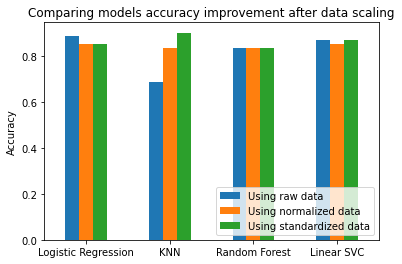

In [79]:
models_comp = [model_scores, model_scores_normalized, model_scores_standardized]
models_comparison = pd.DataFrame(models_comp)

models_comparison.T.plot.bar();
plt.title('Comparing models accuracy improvement after data scaling');
plt.legend(['Using raw data', 'Using normalized data', 'Using standardized data'], loc='lower right');
plt.xticks(rotation=0);
plt.ylabel('Accuracy');

### Tuning the models

The models will be tuned based on the following items:
1. hyperparameter tuning
* confusion matrix
* cross-validation
* precision
* recall
* f1 score
* classification report
* ROC curve
* area under curve
* feature importance

In order to be able to have a sense of the improvement of all models, I'll use raw data, normalized data and standardized data.

#### 1. Hyperparameter Tuning

##### K-Neighbors Classifier 

First I'll try only increasing the number of neighbors for the KNN model using raw, normalized and standardized data.

In [80]:
# Set a random seed
np.random.seed(42)

train_scores = []
test_scores = []

train_scores_normalized = []
test_scores_normalized = []

train_scores_standardized = []
test_scores_standardized = []

# Create a list of different values for n_neighbors
neighbors = range(1, 26)


# Instantiate KNN
knei = KNeighborsClassifier()

In [81]:
# Fit KNN for each value of n_neighbors previously defined using raw data
for i in neighbors:
    knei.set_params(n_neighbors=i)
    knei.fit(X_train, y_train)
    
    # Add the score obtained for each value of n_neighbors to the lists of train and test scores
    train_scores.append(knei.score(X_train, y_train))
    test_scores.append(knei.score(X_test, y_test))

In [82]:
# Fit KNN for each value of n_neighbors previously defined using normalized data
for i in neighbors:
    knei.set_params(n_neighbors=i)
    knei.fit(X_train_normalized, y_train)
    
    # Add the score obtained for each value of n_neighbors to the lists of train and test scores
    train_scores_normalized.append(knei.score(X_train_normalized, y_train))
    test_scores_normalized.append(knei.score(X_test_normalized, y_test))    

In [83]:
# Fit KNN for each value of n_neighbors previously defined using standardized data
for i in neighbors:
    knei.set_params(n_neighbors=i)
    knei.fit(X_train_standardized, y_train)
    
    # Add the score obtained for each value of n_neighbors to the lists of train and test scores
    train_scores_standardized.append(knei.score(X_train_standardized, y_train))
    test_scores_standardized.append(knei.score(X_test_standardized, y_test))      

In [84]:
train_sets_scores =pd.DataFrame(list(zip(train_scores, train_scores_normalized, train_scores_standardized)),
                                columns =['train_scores', 'train_scores_normalized', 'train_scores_standardized']) 
train_sets_scores

,train_scores,train_scores_normalized,train_scores_standardized
0,1.000000,1.000000,1.000000
1,0.809917,0.880165,0.884298
2,0.772727,0.884298,0.888430
3,0.743802,0.859504,0.863636
4,0.760331,0.847107,0.855372
5,0.752066,0.847107,0.851240
6,0.743802,0.863636,0.867769
7,0.723140,0.863636,0.863636
8,0.719008,0.867769,0.855372
9,0.694215,0.859504,0.842975


In [85]:
# Separate KNN results with and without hyperparameter tuning to compare

max_score =  [model_scores['KNN'], max(test_scores)]
max_score_normalized = [model_scores_normalized['KNN'], max(test_scores_normalized)]
max_score_standardized = [model_scores_standardized['KNN'], max(test_scores_standardized)]

In [86]:

knn['knn_tun_more_neig'] = max(test_scores)
knn['knn_tun_more_neig_nor'] = max(test_scores_normalized)
knn['knn_tun_more_neig_std'] = max(test_scores_standardized)

In [87]:
dicts

[{'lr_no_tuning': 0.8852459016393442,
  'lr_no_tuning_nor': 0.8524590163934426,
  'lr_no_tuning_std': 0.8524590163934426},
 {'knn_no_tuning': 0.6885245901639344,
  'knn_no_tuning_nor': 0.8360655737704918,
  'knn_no_tuning_std': 0.9016393442622951,
  'knn_tun_more_neig': 0.7540983606557377,
  'knn_tun_more_neig_nor': 0.8524590163934426,
  'knn_tun_more_neig_std': 0.9180327868852459},
 {'rf_no_tuning': 0.8360655737704918,
  'rf_no_tuning_nor': 0.8360655737704918,
  'rf_no_tuning_std': 0.8360655737704918},
 {'ls_no_tuning': 0.8688524590163934,
  'ls_no_tuning_nor': 0.8524590163934426,
  'ls_no_tuning_std': 0.8688524590163934}]

In [88]:
tuned_scores = [max_score, max_score_normalized, max_score_standardized]

test_sets_scores =pd.DataFrame(list(zip(test_scores, test_scores_normalized, test_scores_standardized)),
                                columns =['test_scores', 'test_scores_normalized', 'test_scores_standardized']) 
test_sets_scores

,test_scores,test_scores_normalized,test_scores_standardized
0,0.622951,0.803279,0.852459
1,0.639344,0.754098,0.819672
2,0.655738,0.852459,0.852459
3,0.672131,0.786885,0.852459
4,0.688525,0.836066,0.901639
5,0.721311,0.819672,0.901639
6,0.704918,0.819672,0.918033
7,0.688525,0.803279,0.868852
8,0.688525,0.819672,0.901639
9,0.704918,0.819672,0.885246


Text(0.5, 1.0, 'Train set scores using between 1 and 25 neighbors')

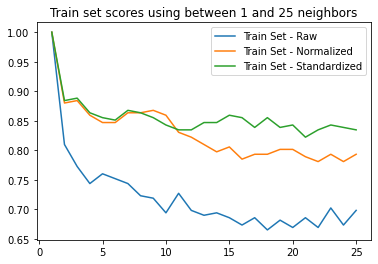

In [89]:
plt.plot(neighbors, train_sets_scores);
plt.legend(['Train Set - Raw', 'Train Set - Normalized', 'Train Set - Standardized', 'Test Set - Raw', 'Test Set - Normalized', 'Test Set - Standardized']);
plt.title('Train set scores using between 1 and 25 neighbors')

Maximum KNN score for the test set on raw data: 75.41%
Maximum KNN score for the test set on normalized data: 85.25%
Maximum KNN score for the test set on standardized data: 91.80%


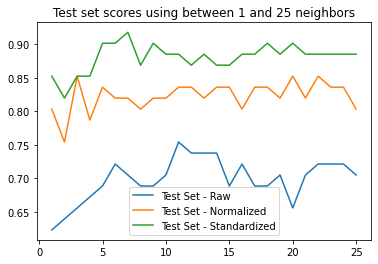

In [90]:
plt.plot(neighbors, test_sets_scores);
plt.legend(['Test Set - Raw', 'Test Set - Normalized', 'Test Set - Standardized']);
plt.title('Test set scores using between 1 and 25 neighbors')

print(f'Maximum KNN score for the test set on raw data: {max(test_scores)*100:.2f}%')
print(f'Maximum KNN score for the test set on normalized data: {max(test_scores_normalized)*100:.2f}%')
print(f'Maximum KNN score for the test set on standardized data: {max(test_scores_standardized)*100:.2f}%')

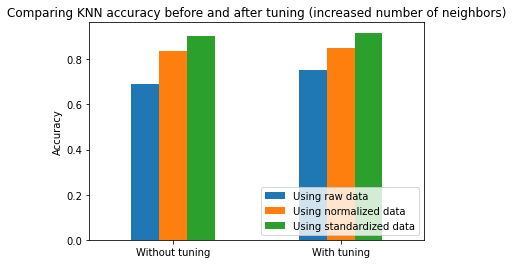

In [91]:
models_comp = [max_score, max_score_normalized, max_score_standardized]
models_comparison = pd.DataFrame(models_comp, index = ['Raw data', 'Normalized data', 'Standardized data'])
models_comparison.rename(columns = {0:'Without tuning', 1:'With tuning'}, inplace = True)


models_comparison.T.plot.bar();
plt.title('Comparing KNN accuracy before and after tuning (increased number of neighbors)');
plt.legend(['Using raw data', 'Using normalized data', 'Using standardized data'], loc='lower right');
ticks = [0,1]
labels = ['Without tuning', 'With tuning']
plt.xticks(ticks, labels, rotation=0);
plt.ylabel('Accuracy');

In [92]:
models_comparison

,Without tuning,With tuning
Raw data,0.688525,0.754098
Normalized data,0.836066,0.852459
Standardized data,0.901639,0.918033


**-> Randomized Search CV**

##### Logistic Regression

To try and improve the Logistic Regression model performance using Randomized Search CV, I will pass the following parameters to a dictionary, over which the randomized search will iterate over and randomly select combinations (number of combinations given by `n_iter`) to train and test.

* `C`: parameter that determines the strenght of the regularization ([regularization as a penalty against complexity](https://www.kdnuggets.com/2016/06/regularization-logistic-regression.html), i.e. it helps the model be less affected by abnormalities and prevents overfitting). C is the inverse of the regulaziation strenght, so higher values of C mean less regularization. 
* `solver`: algorithm to use in the optimization problem
* `penalty`


https://www.knime.com/blog/regularization-for-logistic-regression-l1-l2-gauss-or-laplace

In [93]:
# Create a Hyperparameter dictionary for Logistic Regression
log_reg_dict = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear'], 
                'penalty' : ['l1', 'l2']}


# Set a random seed
np.random.seed(42)

# Set up the random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(dual = False),
                                param_distributions=log_reg_dict,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# ^^^^ what each of these arguments in rs_log_reg mean?

In [94]:
# Fit randomized hyperparameter search model for Logistic Regression using RAW DATA
raw_rs_log_reg = rs_log_reg.fit(X_train, y_train)

# Find best hyperparameters for Logistic Regression using RAW DATA
print(raw_rs_log_reg.best_params_)

# Score Logistic Regression using RAW DATA
rs_raw_score_log_reg = raw_rs_log_reg.score(X_test, y_test)
print(f'score on RAW DATA = {rs_raw_score_log_reg}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.23357214690901212}
score on RAW DATA = 0.8852459016393442


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


In [95]:
# Fit randomized hyperparameter search model for Logistic Regression using NORMALIZED DATA
normalized_rs_log_reg = rs_log_reg.fit(X_train_normalized, y_train)

# Find best hyperparameters for Logistic Regression using NORMALIZED DATA
print(normalized_rs_log_reg.best_params_)

# Score Logistic Regression using NORMALIZED DATA
rs_normalized_score_log_reg=normalized_rs_log_reg.score(X_test_normalized, y_test)
print(f'score on NORMALIZED DATA = {rs_normalized_score_log_reg}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'solver': 'liblinear', 'penalty': 'l2', 'C': 29.763514416313132}
score on NORMALIZED DATA = 0.8524590163934426


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [96]:
# Fit randomized hyperparameter search model for Logistic Regression using STANDARDIZED DATA
standardized_rs_log_reg = rs_log_reg.fit(X_train_standardized, y_train)

# Find best hyperparameters for Logistic Regression using STANDARDIZED DATA
print(standardized_rs_log_reg.best_params_)

# Score Logistic Regression using STANDARDIZED DATA
rs_standardized_score_log_reg = standardized_rs_log_reg.score(X_test_standardized, y_test)
print(f'score on STANDARDIZED DATA = {rs_standardized_score_log_reg}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'solver': 'liblinear', 'penalty': 'l2', 'C': 1.623776739188721}
score on STANDARDIZED DATA = 0.8524590163934426


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


* I also tried using `lbfgs` solver but it did not converge and had the same results as `liblinear` even when increasing `max_iter` up to 1E6.
* Increasing `cv` value caused loss in accuracy using raw and normalized data, but for a `cv`=20 the accuracy using standardized data increased to 0.8852459016393442. 
* Because of the extra computational power and time needed to perform using higher `cv` values, I mantained it at the default value of 5, since it resulted in the same accuracy but for a different data group.

* when instantiating the model `LogisticRegression()`, the parameter `dual`is set to false, as according to the model's documentation this is to be preferred when the number of samples if inferior to the number of features.

In [97]:
logistic_regression['lr_rs_tun_raw'] = rs_raw_score_log_reg
logistic_regression['lr_rs_tun_nor'] = rs_normalized_score_log_reg
logistic_regression['lr_rs_tun_std'] = rs_standardized_score_log_reg

In [98]:
dicts

[{'lr_no_tuning': 0.8852459016393442,
  'lr_no_tuning_nor': 0.8524590163934426,
  'lr_no_tuning_std': 0.8524590163934426,
  'lr_rs_tun_raw': 0.8852459016393442,
  'lr_rs_tun_nor': 0.8524590163934426,
  'lr_rs_tun_std': 0.8524590163934426},
 {'knn_no_tuning': 0.6885245901639344,
  'knn_no_tuning_nor': 0.8360655737704918,
  'knn_no_tuning_std': 0.9016393442622951,
  'knn_tun_more_neig': 0.7540983606557377,
  'knn_tun_more_neig_nor': 0.8524590163934426,
  'knn_tun_more_neig_std': 0.9180327868852459},
 {'rf_no_tuning': 0.8360655737704918,
  'rf_no_tuning_nor': 0.8360655737704918,
  'rf_no_tuning_std': 0.8360655737704918},
 {'ls_no_tuning': 0.8688524590163934,
  'ls_no_tuning_nor': 0.8524590163934426,
  'ls_no_tuning_std': 0.8688524590163934}]

##### K-Nearest Neighbors Classifier

* `n_neighbor`: is the number of neighbors used by the model
* `weights`: is the function used to weight each point 
* `algorithm`: is the algorithm used to compute the nearest neighbors. `auto` tries to automatically decide the most appropriate
* `metric`: distance metric used for the tree

In [99]:
# Create a Hyperparameter dictionary for KNN
knn_dict = {'n_neighbors': range(1, 26),
            'weights': ['uniform', 'distance'],
            'algorithm':['auto'],
            'metric':['euclidean', 'manhattan']}

                 # 'metric':['euclidean', 'manhattan']   

    
# Set a random seed
np.random.seed(42)

# Set up random hyperparameter search for KNN
rs_knn = RandomizedSearchCV(KNeighborsClassifier(),
                            param_distributions=knn_dict,
                            cv=5,
                            n_iter=20, 
                            verbose=True)

In [100]:
# Fit randomized hyperparameter search model for KNN using RAW DATA
raw_rs_knn = rs_knn.fit(X_train, y_train)

# Find best hyperparameters for KNN using RAW DATA
print(raw_rs_knn.best_params_)

# Score KNN using RAW DATA
rs_raw_score_knn = raw_rs_knn.score(X_test, y_test)
print(f'score on RAW DATA = {rs_raw_score_knn}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'weights': 'uniform', 'n_neighbors': 3, 'metric': 'euclidean', 'algorithm': 'auto'}
score on RAW DATA = 0.6557377049180327


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [101]:
# Fit randomized hyperparameter search model for KNN using NORMALIZED DATA
normalized_rs_knn = rs_knn.fit(X_train_normalized, y_train)

# Find best hyperparameters for KNN using NORMALIZED DATA
print(normalized_rs_knn.best_params_)

# Score KNN using NORMALIZED DATA
rs_normalized_score_knn = normalized_rs_knn.score(X_test_normalized, y_test)
print(f'score on NORMALIZED DATA = {rs_normalized_score_knn}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan', 'algorithm': 'auto'}
score on NORMALIZED DATA = 0.8524590163934426


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [102]:
# Fit randomized hyperparameter search model for KNN using STANDARDIZED DATA
standardized_rs_knn = rs_knn.fit(X_train_standardized, y_train)

# Find best hyperparameters for KNN using STANDARDIZED DATA
print(standardized_rs_knn.best_params_)

# Score KNN using STANDARDIZED DATA
rs_standardized_score_knn = standardized_rs_knn.score(X_test_standardized, y_test)
print(f'score on STANDARDIZED DATA = {rs_standardized_score_knn}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'weights': 'distance', 'n_neighbors': 18, 'metric': 'manhattan', 'algorithm': 'auto'}
score on STANDARDIZED DATA = 0.8852459016393442


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [103]:
knn['knn_rs_tun_raw'] = rs_raw_score_knn
knn['knn_rs_tun_nor'] = rs_normalized_score_knn
knn['knn_rs_tun_std'] = rs_standardized_score_knn

dicts

[{'lr_no_tuning': 0.8852459016393442,
  'lr_no_tuning_nor': 0.8524590163934426,
  'lr_no_tuning_std': 0.8524590163934426,
  'lr_rs_tun_raw': 0.8852459016393442,
  'lr_rs_tun_nor': 0.8524590163934426,
  'lr_rs_tun_std': 0.8524590163934426},
 {'knn_no_tuning': 0.6885245901639344,
  'knn_no_tuning_nor': 0.8360655737704918,
  'knn_no_tuning_std': 0.9016393442622951,
  'knn_tun_more_neig': 0.7540983606557377,
  'knn_tun_more_neig_nor': 0.8524590163934426,
  'knn_tun_more_neig_std': 0.9180327868852459,
  'knn_rs_tun_raw': 0.6557377049180327,
  'knn_rs_tun_nor': 0.8524590163934426,
  'knn_rs_tun_std': 0.8852459016393442},
 {'rf_no_tuning': 0.8360655737704918,
  'rf_no_tuning_nor': 0.8360655737704918,
  'rf_no_tuning_std': 0.8360655737704918},
 {'ls_no_tuning': 0.8688524590163934,
  'ls_no_tuning_nor': 0.8524590163934426,
  'ls_no_tuning_std': 0.8688524590163934}]

* Despite the observed increase in accuracy, the best result remains the one obtained from scoring the standardized data without hyperparameter tuning.

##### Random Forest

To try and improve the Random Forest model performance using Randomized Search CV, I will pass the following parameters to a dictionary, over which the randomized search will iterate over and randomly select combinations (number of combinations given by `n_iter`) to train and test.

* `n_estimators`: is the number of decision trees used in the model's forest. The default value is 10 trees in the forest.
* `max_depth`: is the maximum depth of the decision trees. The default value is none, i.e. no maximum depth. This means that by default every tree will be expanded until all the data on every leaf comes from the same class (the leaf is said pure).
* `min_samples_split`: is how many samples there must be in an internal node before it can be split into more specific classifications
* `min_samples_leaf`: is how many samples a leaf must classify



In [104]:
# Create a Hyperparameter dictionary for Random Forest
rf_dict = {'n_estimators':np.arange(10, 1000, 50),
          'max_depth':[None, 3, 5, 10],
          'min_samples_split':np.arange(2, 20, 2),
          'min_samples_leaf':np.arange(1, 20, 2)}

# Set a random seed
np.random.seed(42)

# Set up the random hyperparameter search for Random Forest Classifier
rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_dict,
                         cv = 5,
                         n_iter=20,
                         verbose=True)

In [105]:
# Fit randomized hyperparameter search model for Random Forest using RAW DATA
raw_rs_rf = rs_rf.fit(X_train, y_train)

# Find best hyperparameters for Random Forest using RAW DATA
print(raw_rs_rf.best_params_)

# Score Random Forest using RAW DATA
rs_raw_score_rf = raw_rs_rf.score(X_test, y_test)
print(f'score on RAW DATA = {rs_raw_score_rf}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


{'n_estimators': 210, 'min_samples_split': 4, 'min_samples_leaf': 19, 'max_depth': 3}
score on RAW DATA = 0.8688524590163934


In [106]:
# Fit randomized hyperparameter search model for Random Forest using NORMALIZED DATA
normalized_rs_rf = rs_rf.fit(X_train_normalized, y_train)

# Find best hyperparameters for Random Forest using NORMALIZED DATA
print(normalized_rs_rf.best_params_)

# Score Random Forest using NORMALIZED DATA
rs_normalized_score_rf = normalized_rs_rf.score(X_test_normalized, y_test)
print(f'score on NORMALIZED DATA = {rs_normalized_score_rf}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


{'n_estimators': 510, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_depth': 3}
score on NORMALIZED DATA = 0.8688524590163934


In [107]:
# Fit randomized hyperparameter search model for Random Forest using NORMALIZED DATA
standardized_rs_rf = rs_rf.fit(X_train_standardized, y_train)

# Find best hyperparameters for Random Forest using NORMALIZED DATA
print(standardized_rs_rf.best_params_)

# Score Random Forest using NORMALIZED DATA
rs_standardized_score_rf = standardized_rs_rf.score(X_test_standardized, y_test)
print(f'score on STANDARDIZED DATA = {rs_standardized_score_rf}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


{'n_estimators': 360, 'min_samples_split': 16, 'min_samples_leaf': 19, 'max_depth': 3}
score on STANDARDIZED DATA = 0.8688524590163934


In [108]:
random_forest['rf_rs_tun_raw'] = rs_raw_score_rf
random_forest['rf_rs_tun_nor'] = rs_normalized_score_rf
random_forest['rf_rs_tun_std'] = rs_standardized_score_rf

dicts

[{'lr_no_tuning': 0.8852459016393442,
  'lr_no_tuning_nor': 0.8524590163934426,
  'lr_no_tuning_std': 0.8524590163934426,
  'lr_rs_tun_raw': 0.8852459016393442,
  'lr_rs_tun_nor': 0.8524590163934426,
  'lr_rs_tun_std': 0.8524590163934426},
 {'knn_no_tuning': 0.6885245901639344,
  'knn_no_tuning_nor': 0.8360655737704918,
  'knn_no_tuning_std': 0.9016393442622951,
  'knn_tun_more_neig': 0.7540983606557377,
  'knn_tun_more_neig_nor': 0.8524590163934426,
  'knn_tun_more_neig_std': 0.9180327868852459,
  'knn_rs_tun_raw': 0.6557377049180327,
  'knn_rs_tun_nor': 0.8524590163934426,
  'knn_rs_tun_std': 0.8852459016393442},
 {'rf_no_tuning': 0.8360655737704918,
  'rf_no_tuning_nor': 0.8360655737704918,
  'rf_no_tuning_std': 0.8360655737704918,
  'rf_rs_tun_raw': 0.8688524590163934,
  'rf_rs_tun_nor': 0.8688524590163934,
  'rf_rs_tun_std': 0.8688524590163934},
 {'ls_no_tuning': 0.8688524590163934,
  'ls_no_tuning_nor': 0.8524590163934426,
  'ls_no_tuning_std': 0.8688524590163934}]

* Using `RandomizedSearchCV` with the hyperparameters set as shown above it was possible to obtain an increase in accuracy in comparison to the results obtained previously, but no further improvement was achieved when trying other hyperparameter values or changing the `cv` and/or `n_iter` values.

##### Linear SVC

To try and improve the Random Forest model performance using Randomized Search CV, I will pass the following parameters to a dictionary, over which the randomized search will iterate over and randomly select combinations (number of combinations given by n_iter) to train and test.

* `C`: is the regularization parameter. The same as in the Logistic Regression model.
* `penalty`: is norm used in the penalization.
* `class_weight`: ajusts the weight of each class


In [109]:
# Create a Hyperparameter dictionary for Linear SVC
linear_svc_dict = {'C': np.logspace(-4, 4, 100),
                   'class_weight': ['balanced'],
                   'penalty' : ['l1', 'l2'] }

# Set a random seed
np.random.seed(42)

# Set up the random hyperparameter search for Random Forest Classifier
rs_linear_svc= RandomizedSearchCV(LinearSVC(dual = False, max_iter=10000),
                                  param_distributions=linear_svc_dict,
                                  cv = 5,
                                  verbose=True)

In [110]:
# Fit randomized hyperparameter search model for Linear SVC using RAW DATA
raw_rs_linear_svc = rs_linear_svc.fit(X_train, y_train)

# Find best hyperparameters for Linear SVC using RAW DATA
print(raw_rs_linear_svc.best_params_)

# Score Linear SVC using RAW DATA
rs_raw_score_linear_svc = raw_rs_linear_svc.score(X_test, y_test)
print(f'score on RAW DATA = {rs_raw_score_linear_svc}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.6280291441834259}
score on RAW DATA = 0.8524590163934426


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


In [111]:
# Fit randomized hyperparameter search model for Linear SVC using NORMALIZED DATA
normalized_rs_linear_svc = rs_linear_svc.fit(X_train_normalized, y_train)

# Find best hyperparameters for Linear SVC using NORMALIZED DATA
print(normalized_rs_linear_svc.best_params_)

# Score Linear SVC using NORMALIZED DATA
rs_normalized_score_linear_svc = normalized_rs_linear_svc.score(X_test_normalized, y_test)
print(f'score on NORMALIZED DATA = {rs_normalized_score_linear_svc}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'penalty': 'l2', 'class_weight': 'balanced', 'C': 4.862601580065354}
score on NORMALIZED DATA = 0.8360655737704918


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


In [112]:
# Fit randomized hyperparameter search model for Linear SVC using STANDARDIZED DATA
standardized_rs_linear_svc = rs_linear_svc.fit(X_train_standardized, y_train)

# Find best hyperparameters for Linear SVC using STANDARDIZED DATA
print(standardized_rs_linear_svc.best_params_)

# Score Linear SVC using STANDARDIZED DATA
rs_standardized_score_linear_svc = standardized_rs_linear_svc.score(X_test_standardized, y_test)
print(f'score on STANDARDIZED DATA = {rs_standardized_score_linear_svc}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.0009326033468832199}
score on STANDARDIZED DATA = 0.8688524590163934


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


In [113]:
linear_svc['ls_rs_tun_raw'] = rs_raw_score_linear_svc
linear_svc['ls_rs_tun_nor'] = rs_normalized_score_linear_svc
linear_svc['ls_rs_tun_std'] = rs_standardized_score_linear_svc

dicts

[{'lr_no_tuning': 0.8852459016393442,
  'lr_no_tuning_nor': 0.8524590163934426,
  'lr_no_tuning_std': 0.8524590163934426,
  'lr_rs_tun_raw': 0.8852459016393442,
  'lr_rs_tun_nor': 0.8524590163934426,
  'lr_rs_tun_std': 0.8524590163934426},
 {'knn_no_tuning': 0.6885245901639344,
  'knn_no_tuning_nor': 0.8360655737704918,
  'knn_no_tuning_std': 0.9016393442622951,
  'knn_tun_more_neig': 0.7540983606557377,
  'knn_tun_more_neig_nor': 0.8524590163934426,
  'knn_tun_more_neig_std': 0.9180327868852459,
  'knn_rs_tun_raw': 0.6557377049180327,
  'knn_rs_tun_nor': 0.8524590163934426,
  'knn_rs_tun_std': 0.8852459016393442},
 {'rf_no_tuning': 0.8360655737704918,
  'rf_no_tuning_nor': 0.8360655737704918,
  'rf_no_tuning_std': 0.8360655737704918,
  'rf_rs_tun_raw': 0.8688524590163934,
  'rf_rs_tun_nor': 0.8688524590163934,
  'rf_rs_tun_std': 0.8688524590163934},
 {'ls_no_tuning': 0.8688524590163934,
  'ls_no_tuning_nor': 0.8524590163934426,
  'ls_no_tuning_std': 0.8688524590163934,
  'ls_rs_tun_ra

* when instantiating the model `LinearSVC`, the parameter dualis set to false, as according to the model's documentation this is to be preferred when the number of samples if inferior to the number of features.
* `RandomizedSearchCV` resulted in an accuracy increase when scoring the model using standardized data.

In [114]:
# ADD HERE PLOT COMPARING RANDOM FOREST BEFORE AND AFTER RANDOMIZED SEARCH CV

**-> Grid Search CV**
 
`GridSearchCV` searches exhaustively over specified parameter values for an estimator.

When running `GridSearchCV` I used the same hyperparameter sets on each model as I had used for `RandomizedSearchCV` in order to compare their results.

##### Logistic Regression 

In [115]:
# # Create a Hyperparameter dictionary for Logisti Regression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear'], 
                'penalty' : ['l1', 'l2']}

# Set a random seed
np.random.seed(42)

# setting up grid hyperparameter search
gs_log_reg = GridSearchCV(LogisticRegression(dual = False),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

In [116]:
# Fit randomized hyperparameter search model for Logistic Regression using RAW DATA
raw_gs_log_reg = gs_log_reg.fit(X_train, y_train)

# Find best hyperparameters for Logistic Regression using RAW DATA
print(raw_gs_log_reg.best_params_)

# Score Logistic Regression using RAW DATA
gs_raw_score_log_reg = raw_gs_log_reg.score(X_test, y_test)
print(f'Grid Search score on RAW DATA = {gs_raw_score_log_reg}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}
Grid Search score on RAW DATA = 0.8852459016393442


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.4s finished


In [117]:
# Fit randomized hyperparameter search model for Logistic Regression using NORMALIZED DATA
normalized_gs_log_reg = gs_log_reg.fit(X_train_normalized, y_train)

# Find best hyperparameters for Logistic Regression using NORMALIZED DATA
print(normalized_gs_log_reg.best_params_)

# Score Logistic Regression using NORMALIZED DATA
gs_normalized_score_log_reg = normalized_gs_log_reg.score(X_test_normalized, y_test)
print(f'Grid Search score on NORMALIZED DATA = {gs_normalized_score_log_reg}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'C': 29.763514416313132, 'penalty': 'l2', 'solver': 'liblinear'}
Grid Search score on NORMALIZED DATA = 0.8524590163934426


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished


In [118]:
# Fit randomized hyperparameter search model for Logistic Regression using STANDARDIZED DATA
standardized_gs_log_reg = gs_log_reg.fit(X_train_standardized, y_train)

# Find best hyperparameters for Logistic Regression using STANDARDIZED DATA
print(standardized_gs_log_reg.best_params_)

# Score Logistic Regression using STANDARDIZED DATA
gs_standardized_score_log_reg = standardized_gs_log_reg.score(X_test_standardized, y_test)
print(f'Grid Search score on STANDARDIZED DATA = {gs_standardized_score_log_reg}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'C': 1.623776739188721, 'penalty': 'l2', 'solver': 'liblinear'}
Grid Search score on STANDARDIZED DATA = 0.8524590163934426


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.0s finished


In [119]:
logistic_regression['lr_gs_tun_raw'] = gs_raw_score_log_reg
logistic_regression['lr_gs_tun_nor'] = gs_normalized_score_log_reg
logistic_regression['lr_gs_tun_std'] = gs_standardized_score_log_reg

dicts

[{'lr_no_tuning': 0.8852459016393442,
  'lr_no_tuning_nor': 0.8524590163934426,
  'lr_no_tuning_std': 0.8524590163934426,
  'lr_rs_tun_raw': 0.8852459016393442,
  'lr_rs_tun_nor': 0.8524590163934426,
  'lr_rs_tun_std': 0.8524590163934426,
  'lr_gs_tun_raw': 0.8852459016393442,
  'lr_gs_tun_nor': 0.8524590163934426,
  'lr_gs_tun_std': 0.8524590163934426},
 {'knn_no_tuning': 0.6885245901639344,
  'knn_no_tuning_nor': 0.8360655737704918,
  'knn_no_tuning_std': 0.9016393442622951,
  'knn_tun_more_neig': 0.7540983606557377,
  'knn_tun_more_neig_nor': 0.8524590163934426,
  'knn_tun_more_neig_std': 0.9180327868852459,
  'knn_rs_tun_raw': 0.6557377049180327,
  'knn_rs_tun_nor': 0.8524590163934426,
  'knn_rs_tun_std': 0.8852459016393442},
 {'rf_no_tuning': 0.8360655737704918,
  'rf_no_tuning_nor': 0.8360655737704918,
  'rf_no_tuning_std': 0.8360655737704918,
  'rf_rs_tun_raw': 0.8688524590163934,
  'rf_rs_tun_nor': 0.8688524590163934,
  'rf_rs_tun_std': 0.8688524590163934},
 {'ls_no_tuning': 0.

* Running `GridSearchCV`on the `LogisticRegression` model using the same set of hyperparameters that was used for `RandomizedSearchCV` achieves the same results. When changing the. parameter `C`, so that 100 samples will be generated in the logspace, is possible to increase the accuracy on the standardized data up to the same value obtained on the raw data. Because of the extra computational power and time needed to execute this, the change was reversed since the same accuracy had already been achieved for a different data group with less effort.

##### K-Nearest Neighbors Classifier

In [120]:
# Create a Hyperparameter dictionary for KNN
gs_knn_dict ={'n_neighbors': range(1, 26),
              'weights': ['uniform', 'distance'],
              'algorithm':['auto'],
              'metric':['euclidean', 'manhattan']}
 
# Set a random seed
np.random.seed(42)

# setting up grid hyperparameter search
gs_knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid=knn_dict,
                      cv=5,
                      verbose=True)

In [121]:
# Fit randomized hyperparameter search model for KNN using RAW DATA
raw_gs_knn = gs_knn.fit(X_train, y_train)

# Find best hyperparameters for KNN using RAW DATA
print(raw_gs_knn.best_params_)

# Score KNN using RAW DATA
gs_raw_score_knn = raw_gs_knn.score(X_test, y_test)
print(f'score on RAW DATA = {gs_raw_score_knn}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
score on RAW DATA = 0.7049180327868853


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.2s finished


In [122]:
# Fit randomized hyperparameter search model for KNN using NORMALIZED DATA
normalized_gs_knn = gs_knn.fit(X_train_normalized, y_train)

# Find best hyperparameters for KNN using NORMALIZED DATA
print(normalized_gs_knn.best_params_)

# Score KNN using NORMALIZED DATA
gs_normalized_score_knn = normalized_gs_knn.score(X_test_normalized, y_test)
print(f'score on NORMALIZED DATA = {gs_normalized_score_knn}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
score on NORMALIZED DATA = 0.8360655737704918


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.0s finished


In [123]:
# Fit randomized hyperparameter search model for KNN using STANDARDIZED DATA
standardized_gs_knn = gs_knn.fit(X_train_standardized, y_train)

# Find best hyperparameters for KNN using STANDARDIZED DATA
print(standardized_gs_knn.best_params_)

# Score KNN using STANDARDIZED DATA
gs_standardized_score_knn = standardized_gs_knn.score(X_test_standardized, y_test)
print(f'score on STANDARDIZED DATA = {gs_standardized_score_knn}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}
score on STANDARDIZED DATA = 0.8852459016393442


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.0s finished


In [124]:
knn['knn_gs_tun_raw'] = gs_raw_score_knn
knn['knn_gs_tun_nor'] = gs_normalized_score_knn
knn['knn_gs_tun_std'] = gs_standardized_score_knn

dicts

[{'lr_no_tuning': 0.8852459016393442,
  'lr_no_tuning_nor': 0.8524590163934426,
  'lr_no_tuning_std': 0.8524590163934426,
  'lr_rs_tun_raw': 0.8852459016393442,
  'lr_rs_tun_nor': 0.8524590163934426,
  'lr_rs_tun_std': 0.8524590163934426,
  'lr_gs_tun_raw': 0.8852459016393442,
  'lr_gs_tun_nor': 0.8524590163934426,
  'lr_gs_tun_std': 0.8524590163934426},
 {'knn_no_tuning': 0.6885245901639344,
  'knn_no_tuning_nor': 0.8360655737704918,
  'knn_no_tuning_std': 0.9016393442622951,
  'knn_tun_more_neig': 0.7540983606557377,
  'knn_tun_more_neig_nor': 0.8524590163934426,
  'knn_tun_more_neig_std': 0.9180327868852459,
  'knn_rs_tun_raw': 0.6557377049180327,
  'knn_rs_tun_nor': 0.8524590163934426,
  'knn_rs_tun_std': 0.8852459016393442,
  'knn_gs_tun_raw': 0.7049180327868853,
  'knn_gs_tun_nor': 0.8360655737704918,
  'knn_gs_tun_std': 0.8852459016393442},
 {'rf_no_tuning': 0.8360655737704918,
  'rf_no_tuning_nor': 0.8360655737704918,
  'rf_no_tuning_std': 0.8360655737704918,
  'rf_rs_tun_raw':

* Using `GridSearchCV` to tune `KNeighborsClassifier` model increases the accuracy on raw and normalized data, but the accuracy on standardized data remains the same.

* Despite the observed increase in accuracy, the best result remains the one obtained from scoring the standardized data without hyperparameter tuning.

##### Random Forest

In [125]:
# Create a Hyperparameter dictionary for Random Forest
rf_dict = {'n_estimators':np.arange(10, 100, 50),
          'max_depth':[None, 3, 5, 10],
          'min_samples_split':np.arange(2, 20, 2),
          'min_samples_leaf':np.arange(1, 20, 2)}

# Set a random seed
np.random.seed(42)

# Set up the random hyperparameter search for Random Forest Classifier
gs_rf= GridSearchCV(RandomForestClassifier(),
                         param_grid=rf_dict,
                         cv = 5,
                         verbose=True)

In [126]:
# Fit randomized hyperparameter search model for Random Forest using RAW DATA
raw_gs_rf = gs_rf.fit(X_train, y_train)

# Find best hyperparameters for Random Forest using RAW DATA
print(raw_gs_rf.best_params_)

# Score Random Forest using RAW DATA
gs_raw_score_rf = raw_gs_rf.score(X_test, y_test)
print(f'score on RAW DATA = {gs_raw_score_rf}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
{'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 16, 'n_estimators': 10}
score on RAW DATA = 0.8524590163934426


[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:  3.4min finished


In [127]:
# Fit randomized hyperparameter search model for Random Forest using NORMALIZED DATA
normalized_gs_rf = gs_rf.fit(X_train_normalized, y_train)

# Find best hyperparameters for Random Forest using NORMALIZED DATA
print(normalized_gs_rf.best_params_)

# Score Random Forest using NORMALIZED DATA
gs_normalized_score_rf = raw_gs_rf.score(X_test_normalized, y_test)
print(f'score on NORMALIZED DATA = {gs_normalized_score_rf}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 10}
score on NORMALIZED DATA = 0.819672131147541


[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:  3.2min finished


In [128]:
# Fit randomized hyperparameter search model for Random Forest using STANDARDIZED DATA
standardized_gs_rf = gs_rf.fit(X_train_standardized, y_train)

# Find best hyperparameters for Random Forest using STANDARDIZED DATA
print(standardized_gs_rf.best_params_)

# Score Random Forest using STANDARDIZED DATA
gs_standardized_score_rf = standardized_gs_rf.score(X_test_standardized, y_test)
print(f'score on STANDARDIZED DATA = {gs_standardized_score_rf}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
{'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14, 'n_estimators': 10}
score on STANDARDIZED DATA = 0.8688524590163934


[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:  3.2min finished


In [129]:
random_forest['rf_gs_tun_raw'] = gs_raw_score_rf
random_forest['rf_gs_tun_nor'] = gs_normalized_score_rf
random_forest['rf_gs_tun_std'] = gs_standardized_score_rf

dicts

[{'lr_no_tuning': 0.8852459016393442,
  'lr_no_tuning_nor': 0.8524590163934426,
  'lr_no_tuning_std': 0.8524590163934426,
  'lr_rs_tun_raw': 0.8852459016393442,
  'lr_rs_tun_nor': 0.8524590163934426,
  'lr_rs_tun_std': 0.8524590163934426,
  'lr_gs_tun_raw': 0.8852459016393442,
  'lr_gs_tun_nor': 0.8524590163934426,
  'lr_gs_tun_std': 0.8524590163934426},
 {'knn_no_tuning': 0.6885245901639344,
  'knn_no_tuning_nor': 0.8360655737704918,
  'knn_no_tuning_std': 0.9016393442622951,
  'knn_tun_more_neig': 0.7540983606557377,
  'knn_tun_more_neig_nor': 0.8524590163934426,
  'knn_tun_more_neig_std': 0.9180327868852459,
  'knn_rs_tun_raw': 0.6557377049180327,
  'knn_rs_tun_nor': 0.8524590163934426,
  'knn_rs_tun_std': 0.8852459016393442,
  'knn_gs_tun_raw': 0.7049180327868853,
  'knn_gs_tun_nor': 0.8360655737704918,
  'knn_gs_tun_std': 0.8852459016393442},
 {'rf_no_tuning': 0.8360655737704918,
  'rf_no_tuning_nor': 0.8360655737704918,
  'rf_no_tuning_std': 0.8360655737704918,
  'rf_rs_tun_raw':

* Because when using `GridSearchCV` fits and scores the model for every single combination of hyperparameters, I decreased the number of estimators (`n_estimators`) in order to decrease the number of fits needed and thus. the time elapsed.  
* For raw and normalized data there was a decrease in accuracy, while for standardized data there was no change.

##### Linear SVC

In [130]:
# Create a Hyperparameter dictionary for Linear SVC
linear_svc_dict = {'C': np.logspace(-4, 4, 100),
                   'class_weight': ['balanced'],
                   'penalty' : ['l1', 'l2'] }

# Set a random seed
np.random.seed(42)

# Set up the random hyperparameter search for Random Forest Classifier
gs_linear_svc= GridSearchCV(LinearSVC(dual = False, max_iter=10000),
                                  param_grid=linear_svc_dict,
                                  cv = 5,
                                  verbose=True)

In [131]:
# Fit randomized hyperparameter search model for Linear SVC using RAW DATA
raw_gs_linear_svc = gs_linear_svc.fit(X_train, y_train)

# Find best hyperparameters for Linear SVC using RAW DATA
print(raw_gs_linear_svc.best_params_)

# Score Linear SVC using RAW DATA
gs_raw_score_linear_svc = raw_gs_linear_svc.score(X_test, y_test)
print(f'score on RAW DATA = {gs_raw_score_linear_svc}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'C': 0.026560877829466867, 'class_weight': 'balanced', 'penalty': 'l2'}
score on RAW DATA = 0.8688524590163934


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.6s finished


In [132]:
# Fit randomized hyperparameter search model for Linear SVC using NORMALIZED DATA
normalized_gs_linear_svc = gs_linear_svc.fit(X_train_normalized, y_train)

# Find best hyperparameters for Linear SVC using NORMALIZED DATA
print(normalized_gs_linear_svc.best_params_)

# Score Linear SVC using NORMALIZED DATA
gs_normalized_score_linear_svc = normalized_gs_linear_svc.score(X_test_normalized, y_test)
print(f'score on NORMALIZED DATA = {gs_normalized_score_linear_svc}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'C': 0.521400828799969, 'class_weight': 'balanced', 'penalty': 'l2'}
score on NORMALIZED DATA = 0.8360655737704918


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.9s finished


In [133]:
# Fit randomized hyperparameter search model for Linear SVC using STANDARDIZED DATA
standardized_gs_linear_svc = gs_linear_svc.fit(X_train_standardized, y_train)

# Find best hyperparameters for Linear SVC using STANDARDIZED DATA
print(standardized_gs_linear_svc.best_params_)

# Score Linear SVC using STANDARDIZED DATA
gs_standardized_score_linear_svc = standardized_gs_linear_svc.score(X_test_standardized, y_test)
print(f'score on STANDARDIZED DATA = {gs_standardized_score_linear_svc}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'C': 0.0005336699231206312, 'class_weight': 'balanced', 'penalty': 'l2'}
score on STANDARDIZED DATA = 0.8524590163934426


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.4s finished


In [134]:
linear_svc['ls_gs_tun_raw'] = gs_raw_score_linear_svc
linear_svc['ls_gs_tun_nor'] = gs_normalized_score_linear_svc
linear_svc['ls_gs_tun_std'] = gs_standardized_score_linear_svc

dicts

[{'lr_no_tuning': 0.8852459016393442,
  'lr_no_tuning_nor': 0.8524590163934426,
  'lr_no_tuning_std': 0.8524590163934426,
  'lr_rs_tun_raw': 0.8852459016393442,
  'lr_rs_tun_nor': 0.8524590163934426,
  'lr_rs_tun_std': 0.8524590163934426,
  'lr_gs_tun_raw': 0.8852459016393442,
  'lr_gs_tun_nor': 0.8524590163934426,
  'lr_gs_tun_std': 0.8524590163934426},
 {'knn_no_tuning': 0.6885245901639344,
  'knn_no_tuning_nor': 0.8360655737704918,
  'knn_no_tuning_std': 0.9016393442622951,
  'knn_tun_more_neig': 0.7540983606557377,
  'knn_tun_more_neig_nor': 0.8524590163934426,
  'knn_tun_more_neig_std': 0.9180327868852459,
  'knn_rs_tun_raw': 0.6557377049180327,
  'knn_rs_tun_nor': 0.8524590163934426,
  'knn_rs_tun_std': 0.8852459016393442,
  'knn_gs_tun_raw': 0.7049180327868853,
  'knn_gs_tun_nor': 0.8360655737704918,
  'knn_gs_tun_std': 0.8852459016393442},
 {'rf_no_tuning': 0.8360655737704918,
  'rf_no_tuning_nor': 0.8360655737704918,
  'rf_no_tuning_std': 0.8360655737704918,
  'rf_rs_tun_raw':

* When fitting the `LinearSVC` model using `GridSearchCV` the fit on raw data did not converge using the default value of 1000 for `max_iter`, so the value was increased to 10000
* Despite the model converging there was no increase in accuracy for any of the data groups 


Before evaluating the model I'll select the best outcome of each model to evaluate:

In [135]:
# Check the maximum score obtained for the Logistic Regression model
max_score_log_reg = max(logistic_regression, key=logistic_regression.get)
print(max_score_log_reg)

lr_no_tuning


**NOTE:** *the score for the Logistic Regression model is the same for the not tuned fitting and the RandomizedSearch fitting of the model. Because the not tuned fitting does not converge, I'll use the Randomized Search one from now on, but the score obtained is the same.*

In [137]:
# Check the maximum score obtained for the K-Nearest Neighbors model
max_score_knn = max(knn, key=knn.get)
print(max_score_knn)

knn_tun_more_neig_std


In [138]:
# Check the maximum score obtained for the Random Forest model
max_score_rf = max(random_forest, key=random_forest.get)
print(max_score_rf)

rf_rs_tun_raw


In [139]:
# Check the maximum score obtained for the Linear SVC model
max_score_svc = max(linear_svc, key=linear_svc.get)
print(max_score_svc)

ls_no_tuning


These will be the variables used for model evaluation from now on.

### Model evaluation:

Evaluation metrics used:

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-Score

In [ ]:
# use cross validation where possible ---> but WHERE is possible?

In [ ]:
# to make comparisons and evaluate our trained model we need to make predictions first

Before evaluating the models I'll make predictions using the test data split. For each model I'll use the split (raw, normalized or standardized data) according to the split on which was based the best score.

In [ ]:
[0].value_counts()

**Logistic Regression Evaluation**

In [198]:
# Make predictions with Logistic Regression
log_reg_y_preds = log_reg.fit(X_train, y_train).predict(X_test)

# Compare predictions with test set targets
log_reg_comp = pd.DataFrame(log_reg_y_preds, y_test)
log_reg_comp

/Users/anacarolinapick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,0
target,
0,0
0,1
1,1
0,0
1,1
...,...
0,0
1,1
0,0


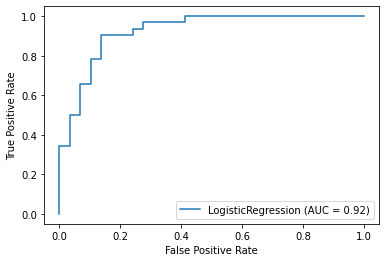

In [199]:
# Plot ROC curve for Logistic Regression

plot_roc_curve(log_reg, X_test, y_test)

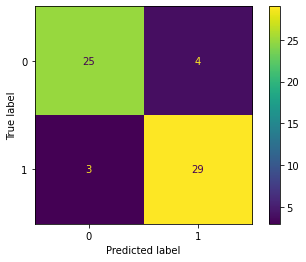

In [200]:
# Confusion Matrix for Logistic Regression

plot_confusion_matrix(log_reg, X_test, y_test)

In [201]:
# Classification report for Logistic Regression

print(classification_report(log_reg_y_preds, y_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



[[ 9.02370116e-03 -1.19120370e+00  8.24430499e-01 -1.25819035e-02
  -9.48707798e-04 -3.07029076e-03  5.16057166e-01  2.84499108e-02
  -8.27055451e-01 -7.01623797e-01  5.99215262e-01 -8.26675578e-01
  -1.06436538e+00]]


<AxesSubplot:title={'center':'Feature importance for Logistic Regression'}>

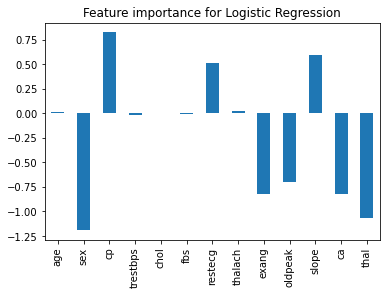

In [267]:
# Feature importance for Logistic Regression

# Check value of coef (coef indicates how each feature contributes to the label)
print(log_reg.coef_)
feature_dict_log_reg = dict(zip(df.columns, list(log_reg.coef_[0])))
feature_dict_log_reg

# Vizualise

feature_imp_log_reg = pd.DataFrame(feature_dict_log_reg, index=[0])
feature_imp_log_reg.T.plot.bar(title='Feature importance for Logistic Regression', 
                               legend=False)

In [247]:
feature_imp_log_reg

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.009024,-1.191204,0.82443,-0.012582,-0.000949,-0.00307,0.516057,0.02845,-0.827055,-0.701624,0.599215,-0.826676,-1.064365


In [264]:
type(log_reg.coef_)

numpy.ndarray

**K-Nearest Neighbors Evaluation**

In [232]:
# Make predictions with KNN (firts I fit it using the number of neighbors that resulted in the highest score)
knei.set_params(n_neighbors=7)
knn_y_preds = knei.fit(X_train_standardized, y_train).predict(X_test_standardized)

# Compare predictions with test set targets
knn_comp = pd.DataFrame(knn_y_preds, y_test)
knn_comp

,0
target,
0,0
0,0
1,1
0,0
1,1
...,...
0,0
1,1
0,0


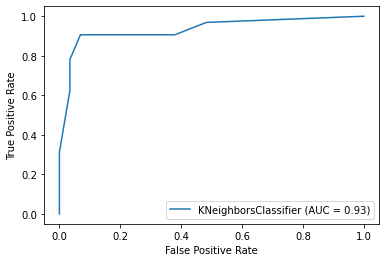

In [233]:
# Plot ROC curve for KNN

plot_roc_curve(knei, X_test_standardized, y_test)

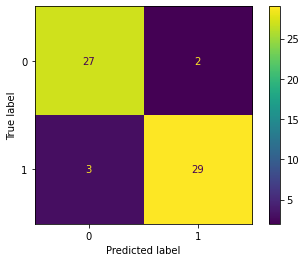

In [234]:
# Confusion Matrix for KNN

plot_confusion_matrix(knei, X_test_standardized, y_test)

In [230]:
# Classification report for KNN

print(classification_report(knn_y_preds, y_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.91      0.94      0.92        31

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [253]:
# Feature importance for K-Nearest Neighbors

# Feature importance is not defined for the KNN Classification algorithm. 
#-> find a way to compute features responsible for classification

**Random Forest Evaluation**

In [237]:
# Make predictions with Random Forest 

# First creating a new classifier using the best parameters found by Randomized Search CV
best_rand = RandomForestClassifier(n_estimators = 310,
                                    min_samples_split = 12,
                                    min_samples_leaf = 17,
                                    max_depth = None)
rf_y_preds = best_rand.fit(X_train, y_train).predict(X_test)

# Compare predictions with test set targets
rf_comp = pd.DataFrame(rf_y_preds, y_test)
rf_comp

,0
target,
0,0
0,1
1,1
0,0
1,1
...,...
0,0
1,1
0,0


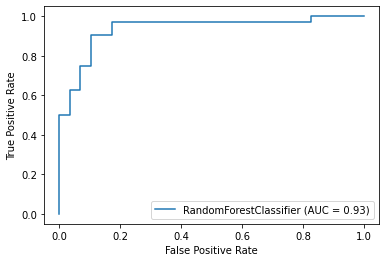

In [195]:
# Plot ROC curve for Random Forest

plot_roc_curve(rs_rf, X_test, y_test)

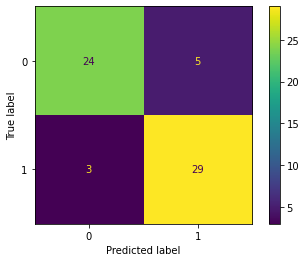

In [196]:
# Confusion Matrix for Random Forest

plot_confusion_matrix(best_rand, X_test, y_test)

In [197]:
# Classification report for Random Forest

print(classification_report(rf_y_preds, y_test))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Feature importance for Linear SVC

# Check value of coef (coef indicates how each feature contributes to the label)
print(lin_svc.coef_)
feature_dict_svc = dict(zip(df.columns, list(lin_svc.coef_[0])))
feature_dict_svc

# Vizualise

feature_imp_svc = pd.DataFrame(feature_dict_svc, index=[0])
feature_imp_svc.T.plot.bar(title='Feature importance for Linear SVC', 
                               legend=False)

[0.05467011 0.03636874 0.15299607 0.01372781 0.013449   0.
 0.00512978 0.08521918 0.13749393 0.11867443 0.06423687 0.16815166
 0.14988243]


<AxesSubplot:title={'center':'Feature importance for Random Forest'}>

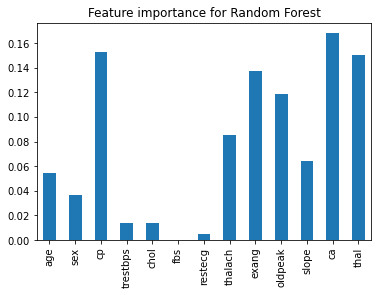

In [296]:
# Feature importance for Random Forest

# Check feature importances values (Random Forest does not have a .coef) 
print(best_rand.feature_importances_)
feature_dict_rand = dict(zip(df.columns, best_rand.feature_importances_))
feature_dict_rand

# Vizualise
feature_imp_rand = pd.DataFrame(feature_dict_rand, index=[0])
feature_imp_rand.T.plot.bar(title='Feature importance for Random Forest', 
                                   legend=False)

In [297]:
feature_imp_rand

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.05467,0.036369,0.152996,0.013728,0.013449,0.0,0.00513,0.085219,0.137494,0.118674,0.064237,0.168152,0.149882


**Linear SVC Evaluation**

In [164]:
# Make predictions with Linear SVC
svc_y_preds = lin_svc.fit(X_train_standardized, y_train).predict(X_test_standardized)

# Compare predictions with test set targets
svc_comp = pd.DataFrame(svc_y_preds, y_test)
svc_comp

,0
target,
0,0
0,1
1,1
0,0
1,1
...,...
0,0
1,1
0,0


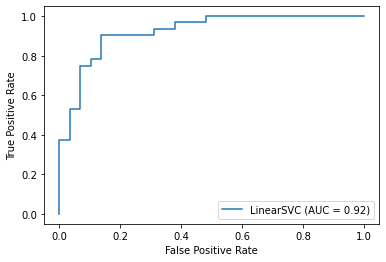

In [173]:
# Plot ROC curve for Linear SVC

plot_roc_curve(lin_svc, X_test_standardized, y_test)

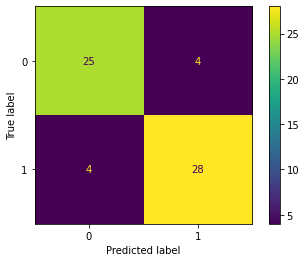

In [181]:
# Confusion Matrix for Linear SVC

plot_confusion_matrix(lin_svc, X_test_standardized, y_test)

In [187]:
# Classification report for Linear SVC

print(classification_report(svc_y_preds, y_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



[[-0.0176116  -0.26948174  0.28981645 -0.1021231  -0.05649204  0.04052184
   0.08494807  0.13375678 -0.18879176 -0.25065941  0.14068812 -0.27513188
  -0.20319408]]


<AxesSubplot:title={'center':'Feature importance for Linear SVC'}>

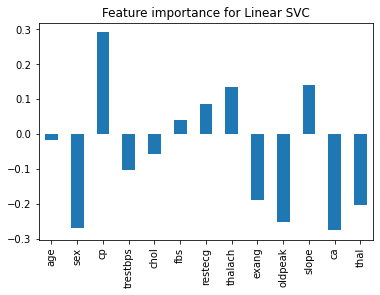

In [277]:
# Feature importance for Linear SVC

# Check value of coef (coef indicates how each feature contributes to the label)
print(lin_svc.coef_)
feature_dict_svc = dict(zip(df.columns, list(lin_svc.coef_[0])))
feature_dict_svc

# Vizualise

feature_imp_svc = pd.DataFrame(feature_dict_svc, index=[0])
feature_imp_svc.T.plot.bar(title='Feature importance for Linear SVC', 
                               legend=False)

In [252]:
feature_imp_svc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.017612,-0.269482,0.289816,-0.102123,-0.056492,0.040522,0.084948,0.133757,-0.188792,-0.250659,0.140688,-0.275132,-0.203194


### Next steps

* add missing explanations to what I did
* implement a form of feature importance computing for KNN model
* try to implement cross validated evaluation